# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010, corresponding to a total of 79354 contacts.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [8]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



Check for missing values

In [27]:
# Check for missing values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

There are no missing values in the dataset.

Check for duplicates

In [28]:
# Check for duplicates
df.duplicated().sum()

12

Very few duplicates found. Should have minimal impacts on the model.

In [29]:
# Check the data types of the features
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

Categorical features will have to be encoded appropriately.

Drop the 'duration' feature from the dataset.

In [30]:
# Drop the 'duration' feature
df = df.drop('duration', axis=1)

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

The primary business objective of this task is to develop a predictive model that can accurately identify whether a client will subscribe to a term deposit based on various demographic, socio-economic, and marketing-related features. This model will help the bank to:

- Improve Marketing Campaigns
- Optimize Resource Allocation
- Enhance Customer Relationship Management
- Increase Conversion Rates

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

Identify Categorical and Numerical Features

In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Define the features and target
X = df.drop('y', axis=1)
y = df['y']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['number']).columns

Plot Categorical Features

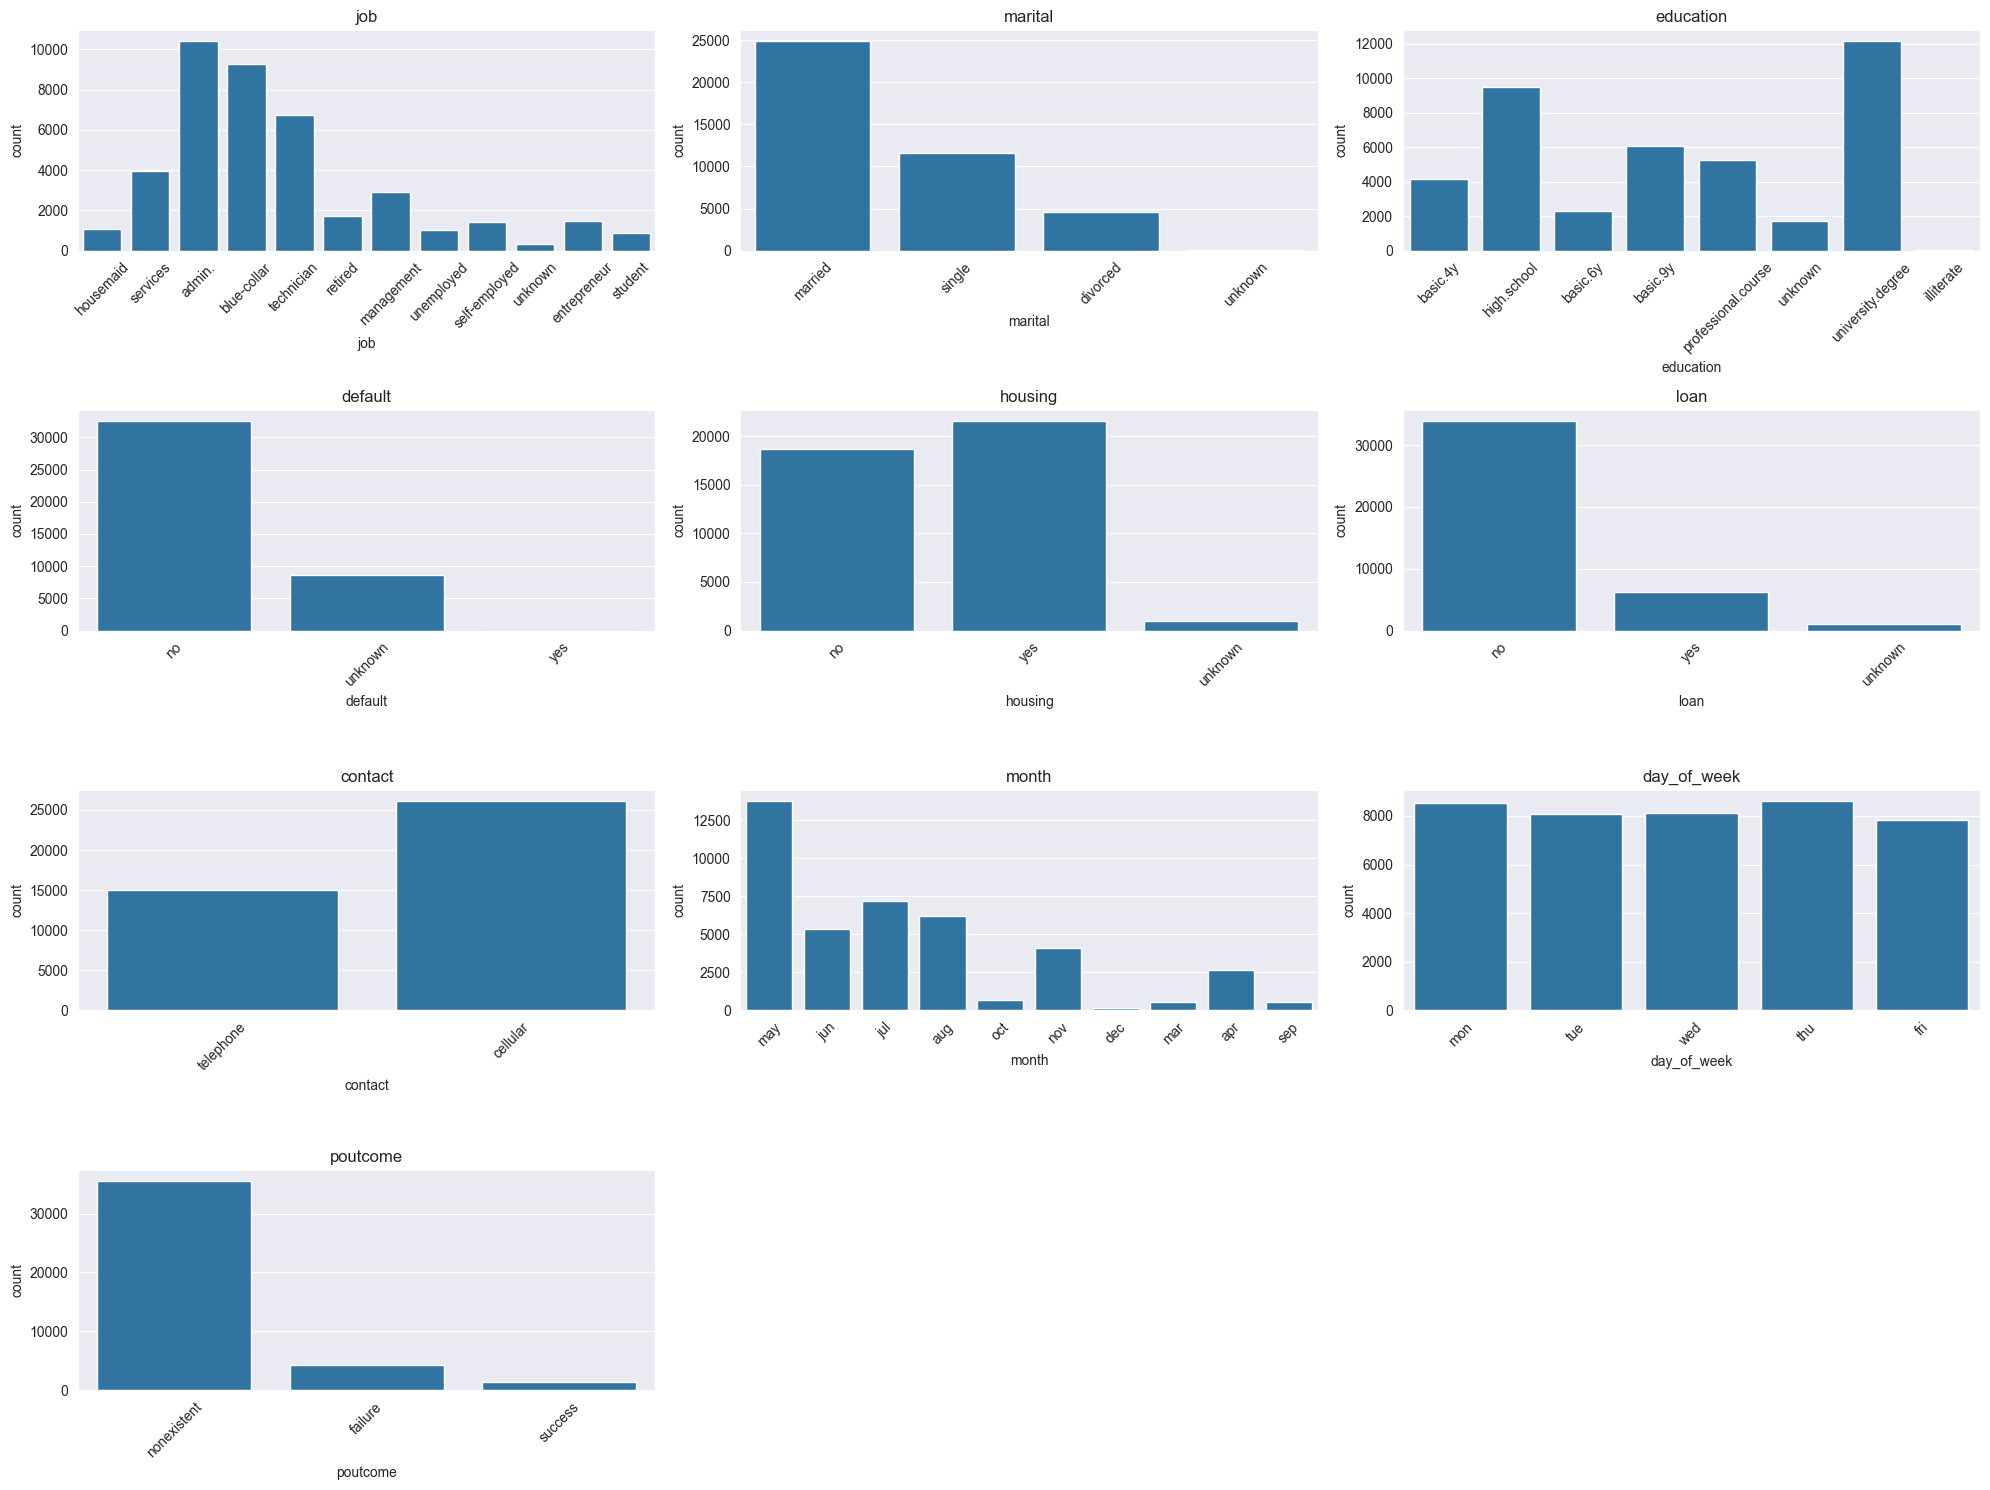

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot categorical features
plt.figure(figsize=(20, 15))
for i, feature in enumerate(categorical_cols, 1):
    plt.subplot(4, 3, i)
    sns.countplot(data=df, x=feature)
    plt.title(feature)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Plot Numerical Features

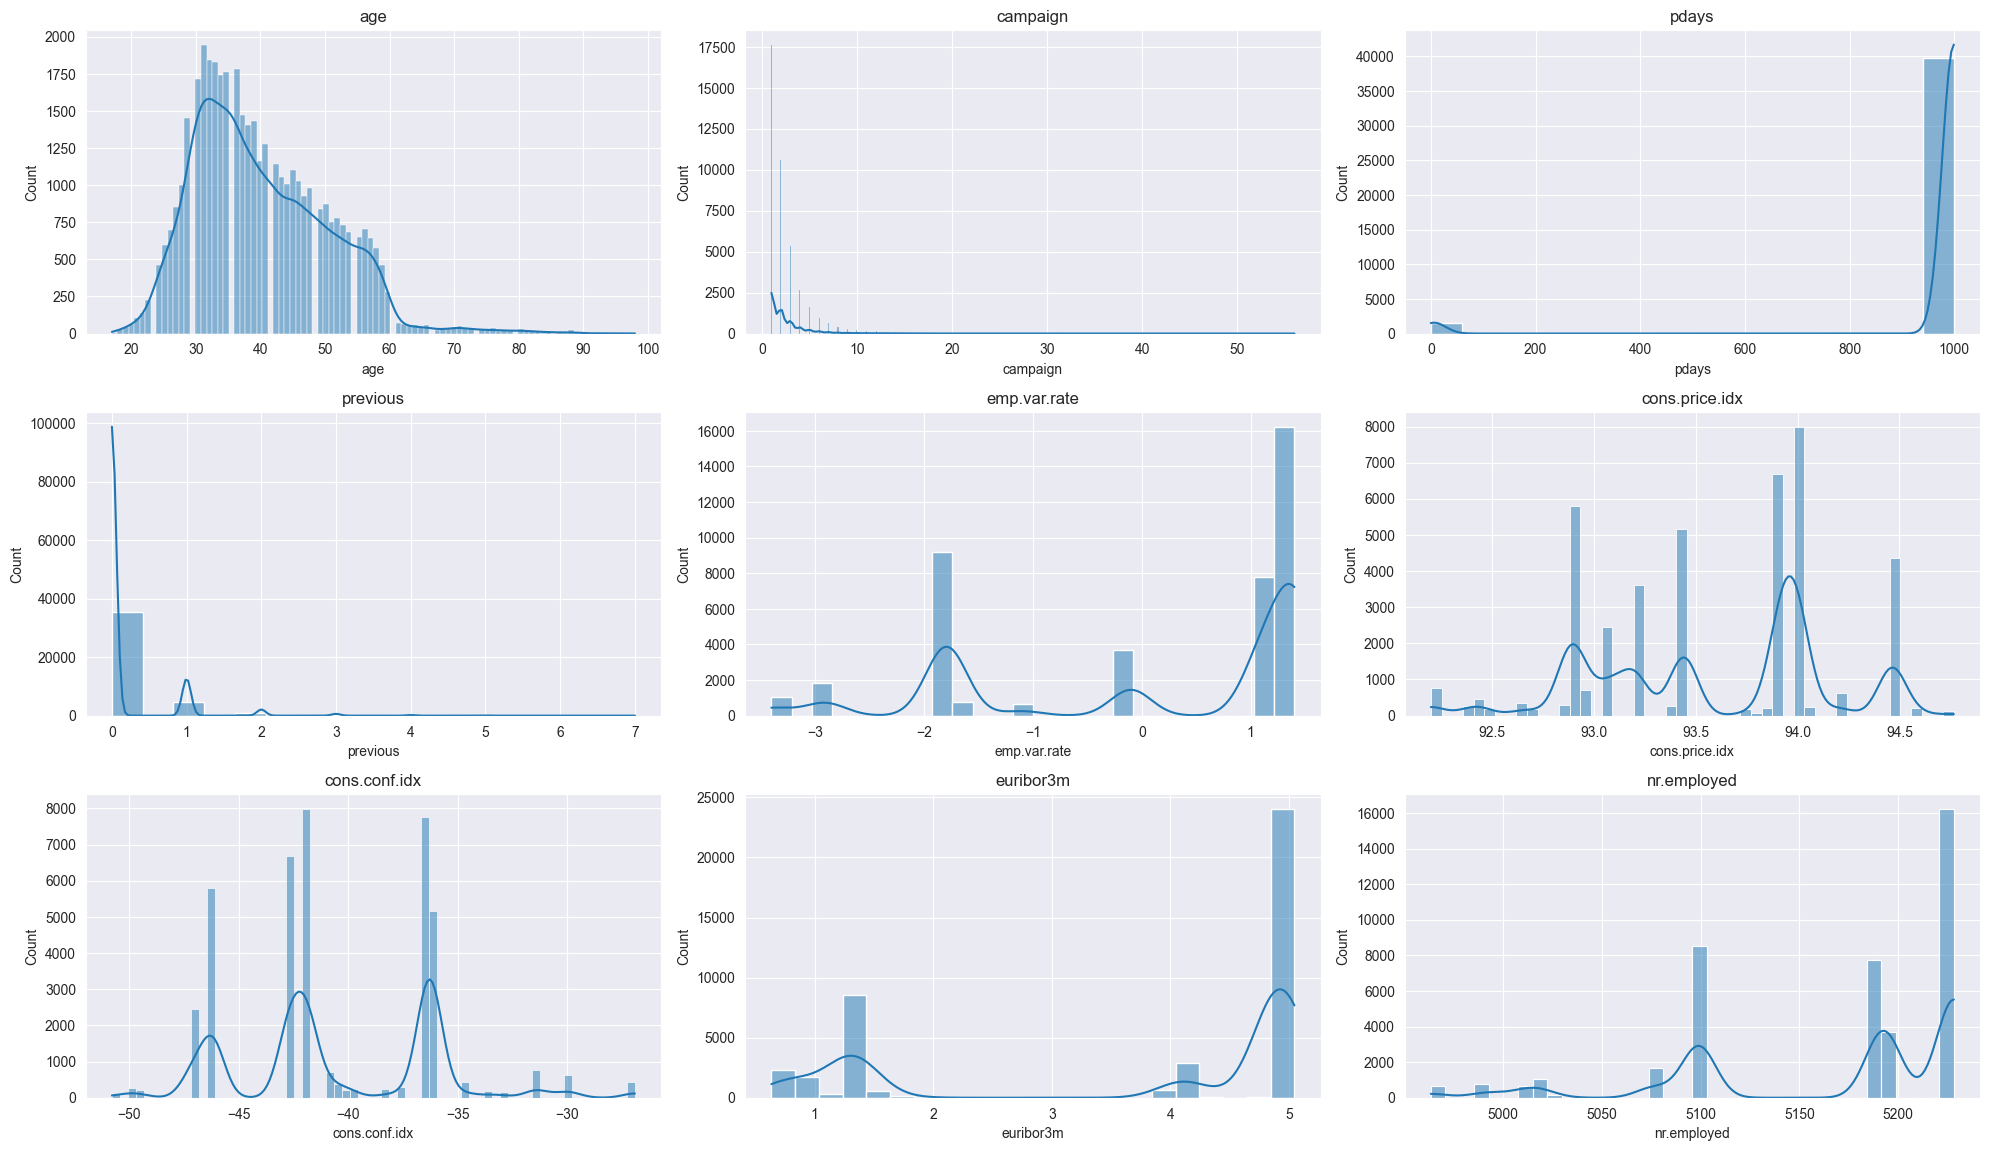

In [34]:
# Plot numerical features
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data=df, x=feature, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

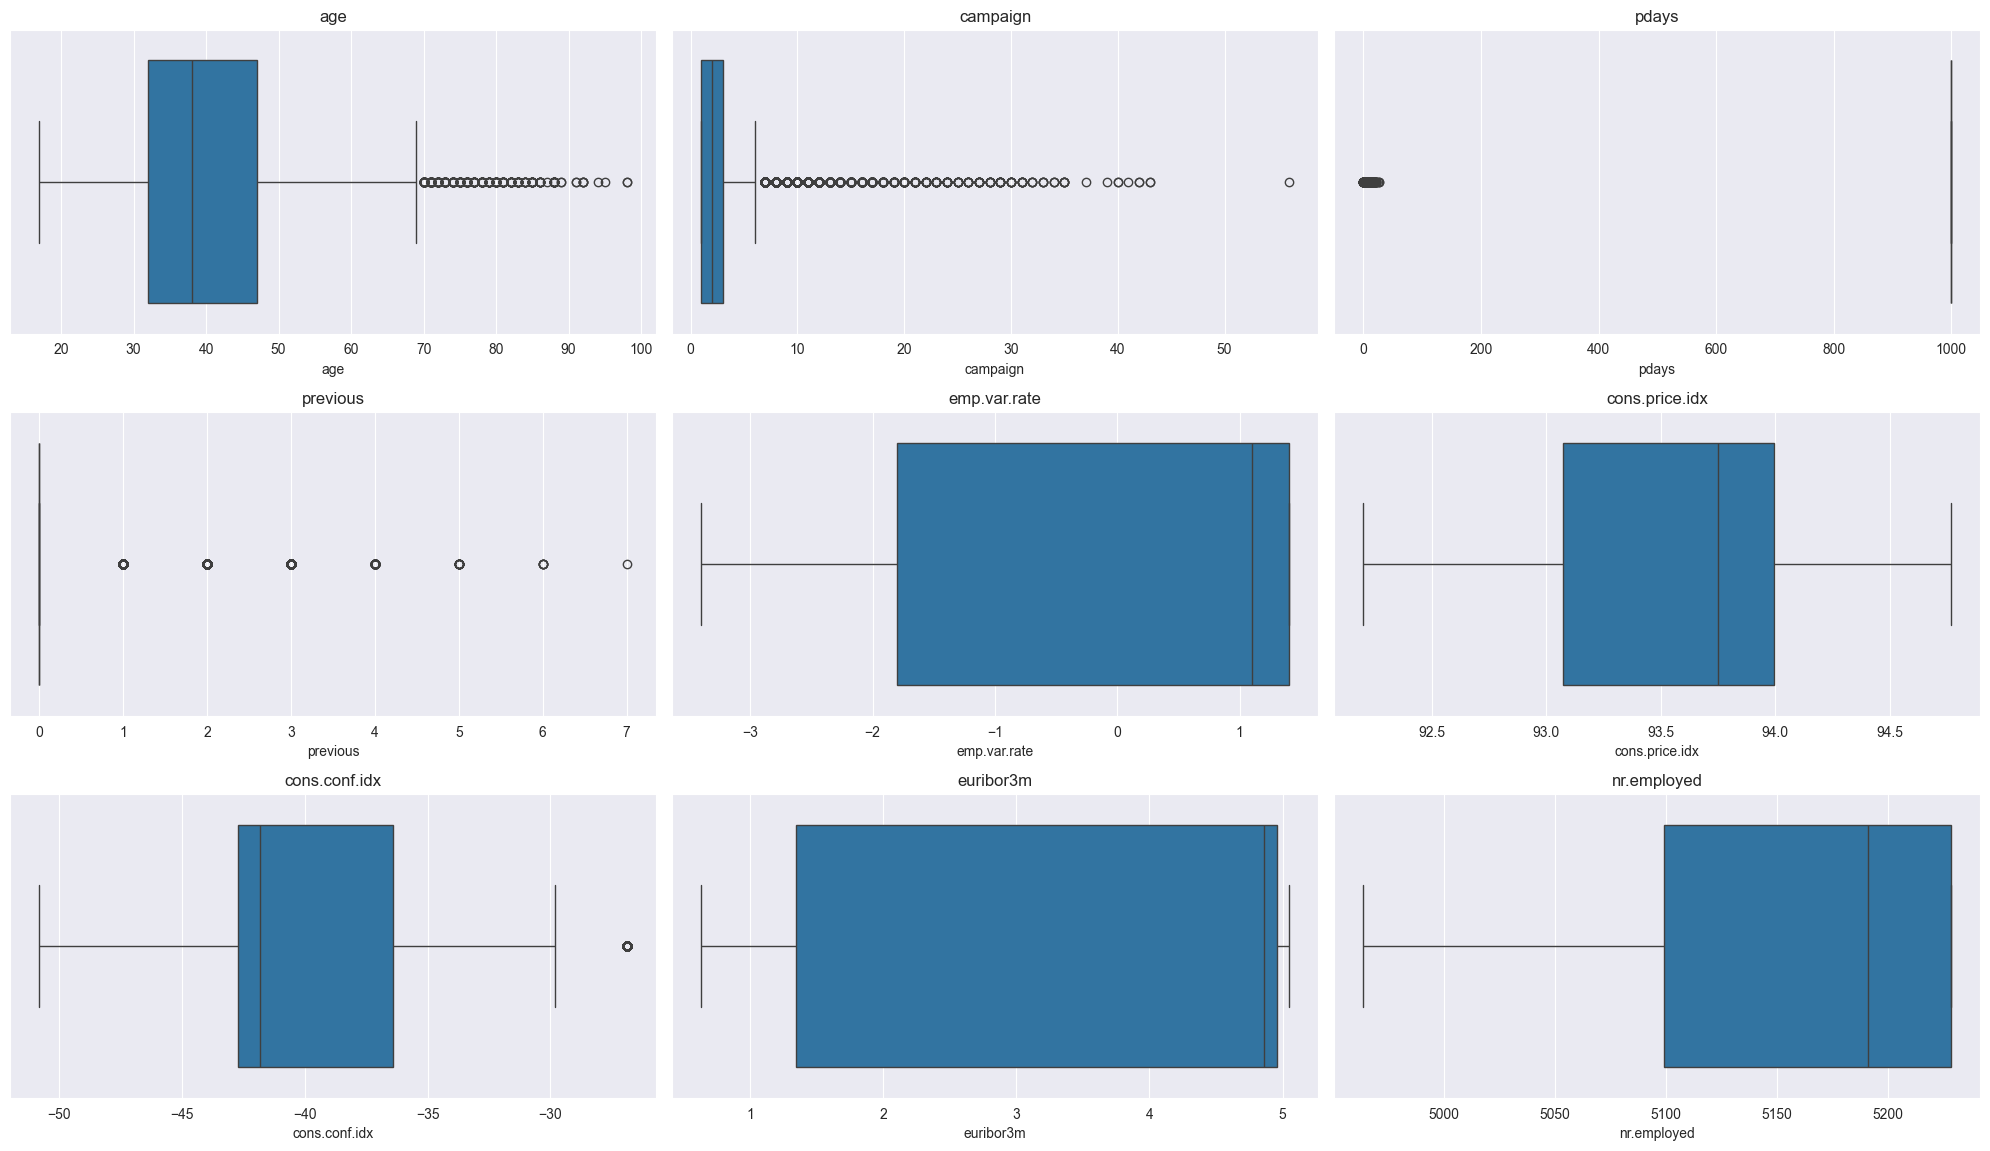

In [35]:
# Generate box plots for numerical features
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df, x=feature)
    plt.title(feature)
plt.tight_layout()
plt.show()

Looking at plots of numerical/continuous features, we can see that there are outliers in the data.  We will remove outliers using the IQR method.

In [36]:
# Function to remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from continuous features
for feature in numerical_cols:
    df = remove_outliers(df, feature)

print("Outliers removed from continuous features.")
print(df.describe())

Outliers removed from continuous features.
                age      campaign    pdays  previous  emp.var.rate  \
count  24919.000000  24919.000000  24919.0   24919.0  24919.000000   
mean      40.145271      2.118664    999.0       0.0      1.136623   
std        9.185945      1.309883      0.0       0.0      0.468379   
min       18.000000      1.000000    999.0       0.0     -0.200000   
25%       33.000000      1.000000    999.0       0.0      1.100000   
50%       39.000000      2.000000    999.0       0.0      1.400000   
75%       47.000000      3.000000    999.0       0.0      1.400000   
max       61.000000      6.000000    999.0       0.0      1.400000   

       cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count    24919.000000   24919.000000  24919.000000  24919.000000  
mean        93.853907     -39.359681      4.830159   5213.367687  
std          0.382315       3.007247      0.262694     17.658305  
min         92.756000     -45.900000      3.053000   5176.

Replot the numerical features to see if outliers have been removed.

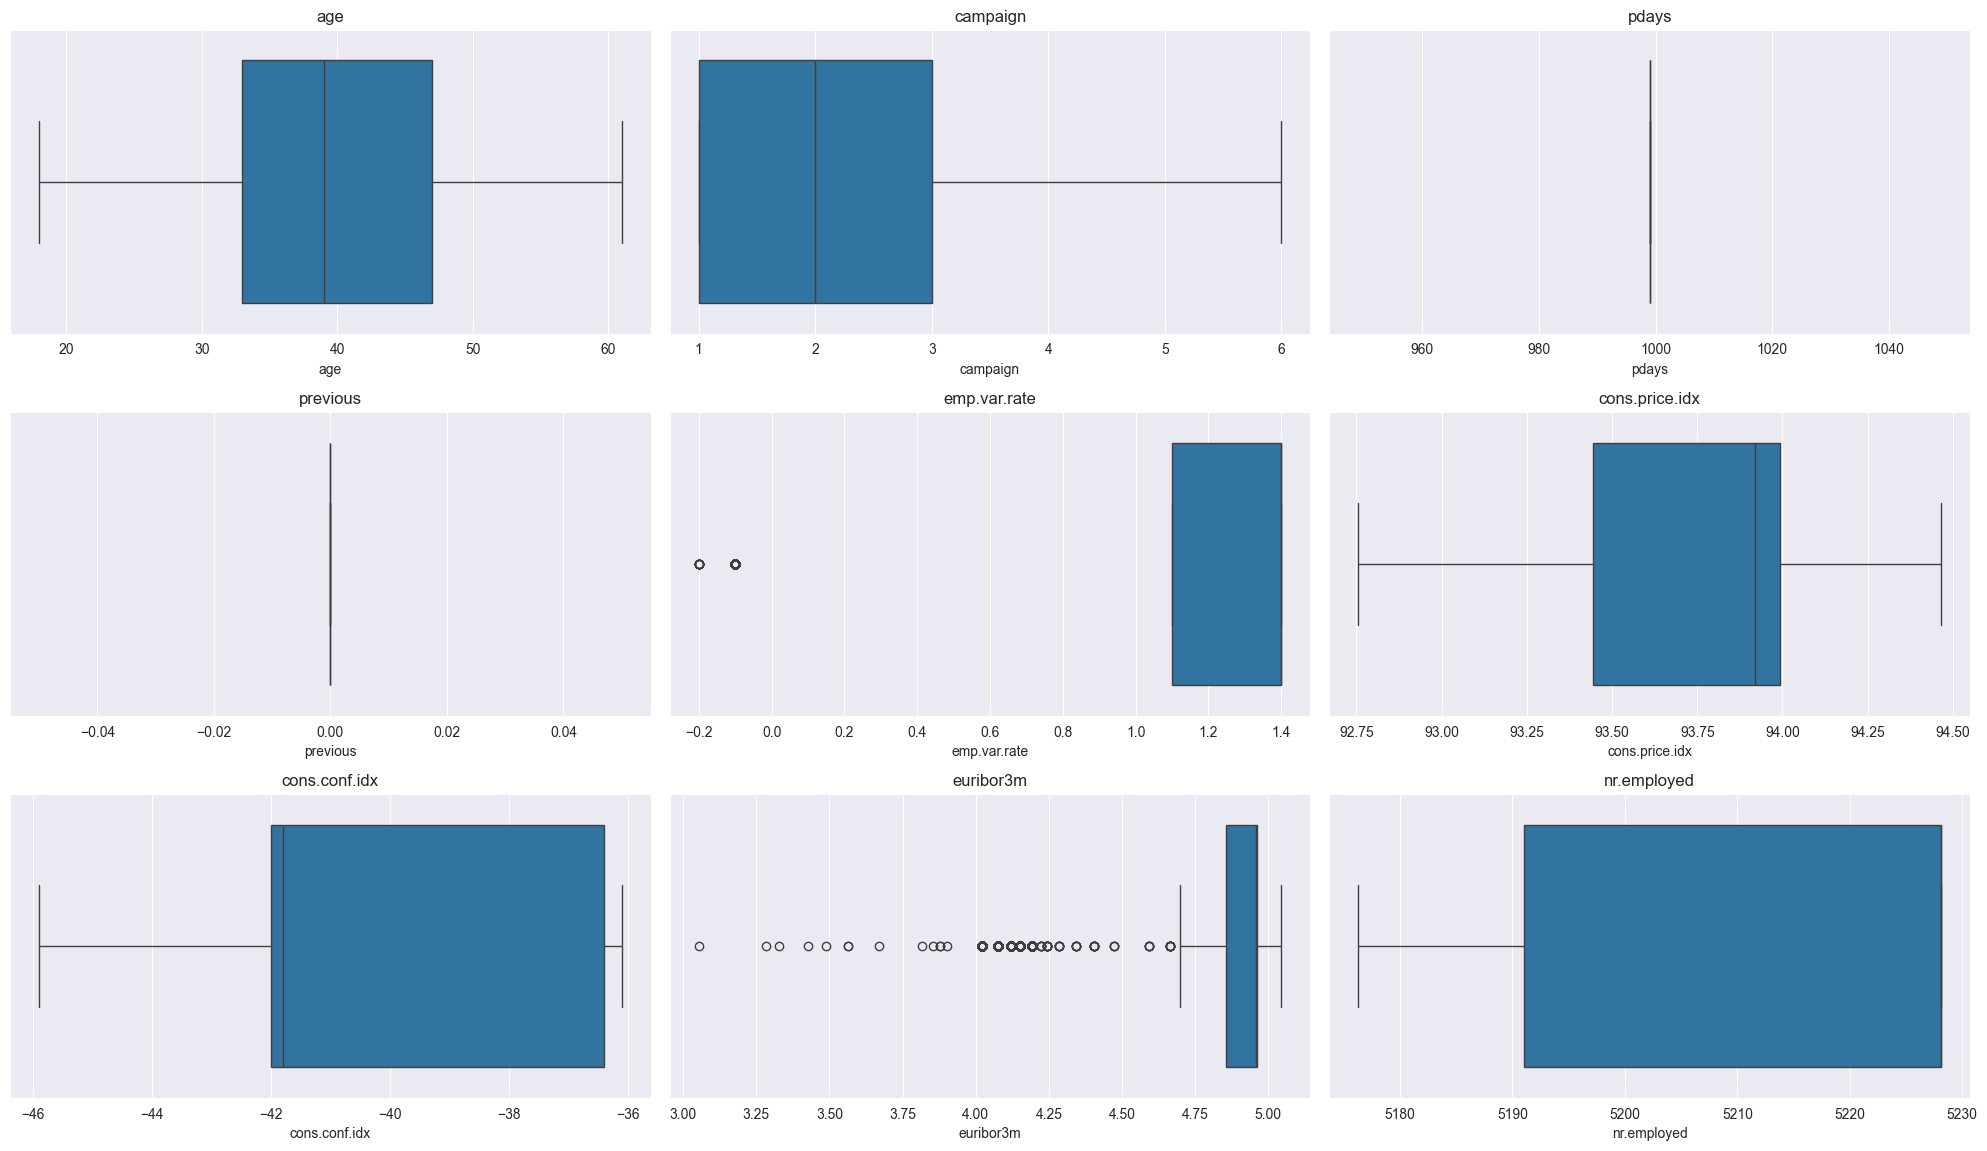

In [37]:
# Generate box plots for numerical features
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df, x=feature)
    plt.title(feature)
plt.tight_layout()
plt.show()

Now that we have removed outliers, we can scale and encode the features as appropriate.

In [38]:
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

Plot the target variable

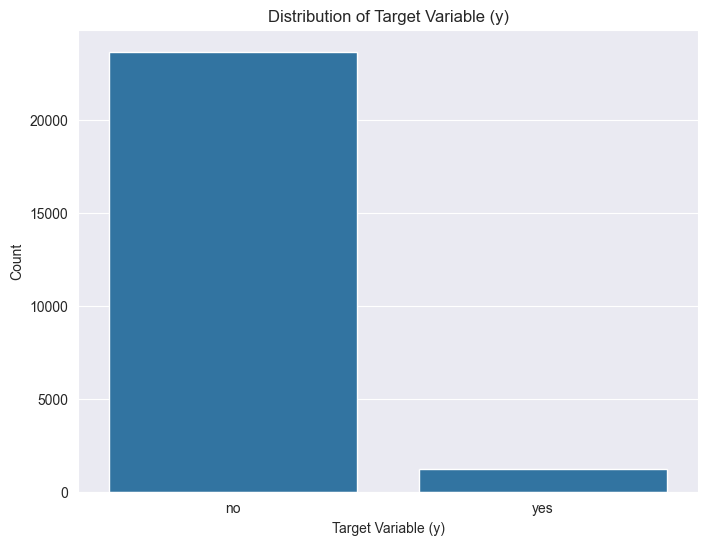

In [39]:
# Plot the target column 'y'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='y')
plt.title('Distribution of Target Variable (y)')
plt.xlabel('Target Variable (y)')
plt.ylabel('Count')
plt.show()

Observe that the target variable is heavily imbalanced. This will negatively impact the performance of the models.

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [40]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply the transformations to the training data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

To establish a baseline performance, we can use the most frequent class in the target variable as our baseline classifier. The idea is to predict the most frequent class for all instances and measure the performance of this simple strategy.

In [41]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score

# Create a dummy classifier that predicts the most frequent class
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train_transformed, y_train)

# Make predictions
y_pred_dummy = dummy_clf.predict(X_test_transformed)

# Calculate accuracy and F1 score
accuracy_dummy = accuracy_score(y_test, y_pred_dummy)
f1_dummy = f1_score(y_test, y_pred_dummy, pos_label='yes')

print('Baseline Accuracy:', accuracy_dummy)
print('Baseline F1 Score:', f1_dummy)

Baseline Accuracy: 0.8865015780529255
Baseline F1 Score: 0.0


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [42]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train_transformed, y_train)

LogisticRegression(max_iter=1000, random_state=42)

### Problem 9: Score the Model

What is the accuracy of your model?

In [43]:
# Make predictions
y_pred_log_reg = log_reg.predict(X_test_transformed)

# Calculate accuracy
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

print('Logistic Regression Accuracy:', accuracy_log_reg)

Logistic Regression Accuracy: 0.8970623937848993


##### Observations:

The Logistic Regression model performs better than the baseline accuracy of 0.88.

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import time

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42)
}

# DataFrame to store results
results = pd.DataFrame(columns=['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy'])

# Fit and score each model
for model_name, model in models.items():
    start_time = time.time()
    model.fit(X_train_transformed, y_train)
    train_time = time.time() - start_time
    train_accuracy = accuracy_score(y_train, model.predict(X_train_transformed))
    test_accuracy = accuracy_score(y_test, model.predict(X_test_transformed))
    results = pd.concat([results, pd.DataFrame({
        'Model': [model_name],
        'Train Time': [train_time],
        'Train Accuracy': [train_accuracy],
        'Test Accuracy': [test_accuracy]
    })], ignore_index=True)

print(results)

/var/folders/6f/h_181plj7sldx6xzpg8l93cw0000gq/T/ipykernel_1344/1756636656.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame({


                    Model  Train Time  Train Accuracy  Test Accuracy
0     Logistic Regression    0.295066        0.901275       0.897062
1     K-Nearest Neighbors    0.042562        0.914264       0.888080
2           Decision Tree    0.190734        0.995357       0.836125
3  Support Vector Machine   66.260615        0.904765       0.896941


##### Observations:

- Logistic Regression and SVM have similar test accuracies, but Logistic Regression is much faster to train.
- KNN has a slightly lower test accuracy but is extremely fast to train.
- Decision Tree overfits the training data and has the lowest test accuracy among the models.

Based on this comparison, Logistic Regression provides a good balance between training time and accuracy. However, further tuning and optimization of these models could potentially improve their performance.



### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

#### Feature Engineering and Exploration:

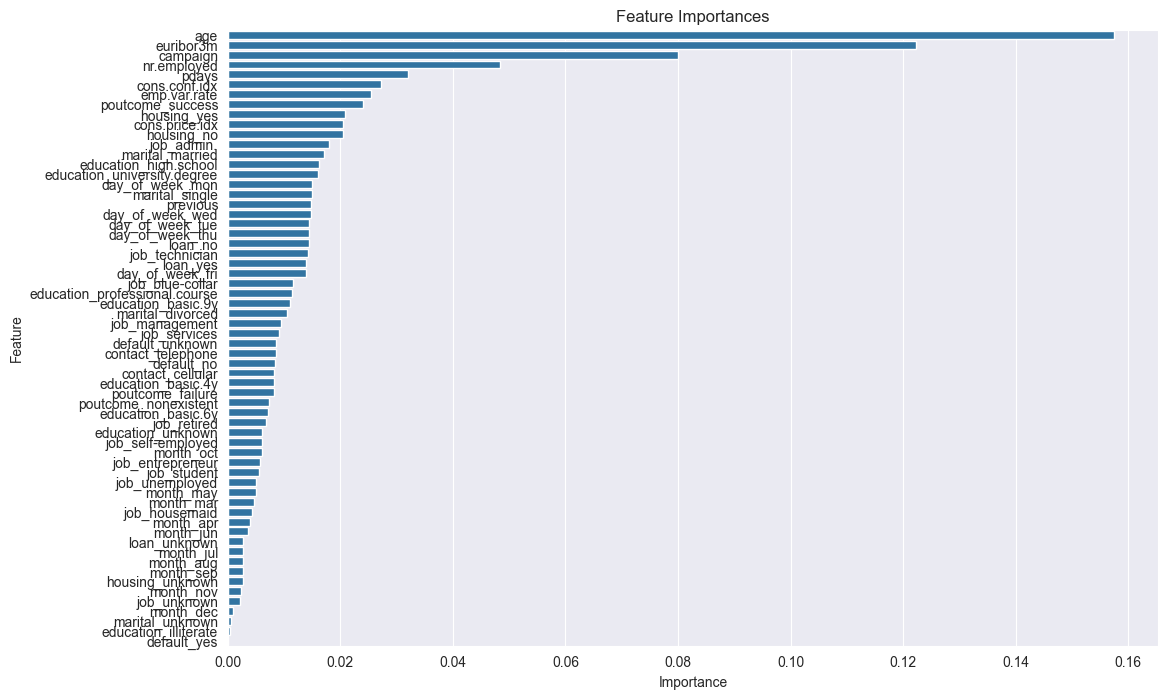

<bound method NDFrame.head of                  Feature  Importance
0                    age    0.157429
7              euribor3m    0.122252
1               campaign    0.079988
8            nr.employed    0.048291
2                  pdays    0.031981
..                   ...         ...
20           job_unknown    0.002066
46             month_dec    0.000917
24       marital_unknown    0.000609
29  education_illiterate    0.000296
35           default_yes    0.000003

[62 rows x 2 columns]>


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Train a RandomForestClassifier to get feature importances
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_transformed, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_names = preprocessor.transformers_[0][2].tolist() + preprocessor.transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_cols).tolist()
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()

print(feature_importances.head)

##### Observations:
- The dataset provided does not explicitly contain a "gender" feature.
- The 'age' feature is the most important by a significant margin.
- Features like 'euribor3m', 'campaign', and nr.employed also have notable importance.
- There is a potential to simplify the model by dropping the less important features.

#### Hyperparameter tuning and grid search:

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids for each model
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs']
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Support Vector Machine': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf']
    }
}

# Initialize results DataFrame
results = pd.DataFrame(columns=['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy'])

# Perform GridSearchCV for each model
for model_name, param_grid in param_grids.items():
    model = models[model_name]
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    start_time = time.time()
    grid_search.fit(X_train_transformed, y_train)
    train_time = time.time() - start_time
    best_model = grid_search.best_estimator_
    train_accuracy = accuracy_score(y_train, best_model.predict(X_train_transformed))
    test_accuracy = accuracy_score(y_test, best_model.predict(X_test_transformed))
    results = pd.concat([results, pd.DataFrame({
        'Model': [model_name],
        'Train Time': [train_time],
        'Train Accuracy': [train_accuracy],
        'Test Accuracy': [test_accuracy]
    })], ignore_index=True)

print(results)

/var/folders/6f/h_181plj7sldx6xzpg8l93cw0000gq/T/ipykernel_1344/2144822443.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame({
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


#### Observations:
- The Support Vector Machine model has the highest training time but also shows competitive accuracy.
- The Logistic Regression model has a slightly lower test accuracy compared to the baseline but is much faster to train.
- The K-Nearest Neighbors and Decision Tree models show reasonable performance but with varying training times.

#### Adjust Performance Metric:

Will use ROC-AUC, precision, recall, and F1-score to evaluate the models.

In [46]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

# Initialize results DataFrame for additional metrics
additional_metrics = pd.DataFrame(columns=['Model', 'ROC-AUC', 'Precision', 'Recall', 'F1-Score'])

# Calculate additional metrics for each model
for model_name, model in models.items():
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_transformed)
    roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test_transformed)[:, 1]) if hasattr(best_model, 'predict_proba') else 'N/A'
    precision = precision_score(y_test, y_pred, pos_label='yes')
    recall = recall_score(y_test, y_pred, pos_label='yes')
    f1 = f1_score(y_test, y_pred, pos_label='yes')
    additional_metrics = pd.concat([additional_metrics, pd.DataFrame({
        'Model': [model_name],
        'ROC-AUC': [roc_auc],
        'Precision': [precision],
        'Recall': [recall],
        'F1-Score': [f1]
    })], ignore_index=True)

print(additional_metrics)

/var/folders/6f/h_181plj7sldx6xzpg8l93cw0000gq/T/ipykernel_2337/2276501946.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  additional_metrics = pd.concat([additional_metrics, pd.DataFrame({


                    Model ROC-AUC  Precision    Recall  F1-Score
0     Logistic Regression     N/A   0.673913  0.431016  0.525766
1     K-Nearest Neighbors     N/A   0.673913  0.431016  0.525766
2           Decision Tree     N/A   0.673913  0.431016  0.525766
3  Support Vector Machine     N/A   0.673913  0.431016  0.525766


#### Observations:
All models have similar precision, recall, and F1-scores.

#### Summary:
- Logistic Regression: Fast training time, competitive accuracy, and balanced additional metrics.
- K-Nearest Neighbors: Reasonable performance with moderate training time.
- Decision Tree: Good performance with moderate training time.
- Support Vector Machine: High training time but competitive accuracy and balanced additional metrics.

#### Next Steps/Recommendations:
- Feature Engineering: Continuing exploring and removing or transforming less important features.
- Hyperparameter Tuning: Continue exploring different hyperparameters for further improvements.
- Performance Metrics: Use a combination of accuracy, ROC-AUC, precision, recall, and F1-score for a comprehensive evaluation.

##### Questions